### Procesamiento de Palabras

0. Agregar una columna que mide el porcentaje de inglés usado en el tweet  y ver con eso  cuántos son en inglés ( tweets que superan cierto threshold de inglés)
1. Diferenciar preguntas de afirmaciones (relacionar con el target)
2. Tweet “inutiles” (tweets sin palabras ingles, cosas raras)



In [10]:
#IMPORTS

import pandas as pd
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run ../datuslib.ipynb

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [11]:
N_df = pd.read_csv("../Data/train.csv")
N_df.text.isnull().sum() #no hay textos vacios

0

In [12]:
N_df['len_texts'] = N_df.text.map(lambda x: len(x))

In [13]:
N_df['porcentaje_de_ingles'] = N_df.text.map(lambda x: porcentajeDeIngles(x))

In [15]:
N_df

,id,keyword,location,text,target,len_texts,porcentaje_de_ingles
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,92.307692
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,57.142857
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,100.000000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,85.714286
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,93.750000
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,85.714286
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,80.952381
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,53.846154
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,95.454545


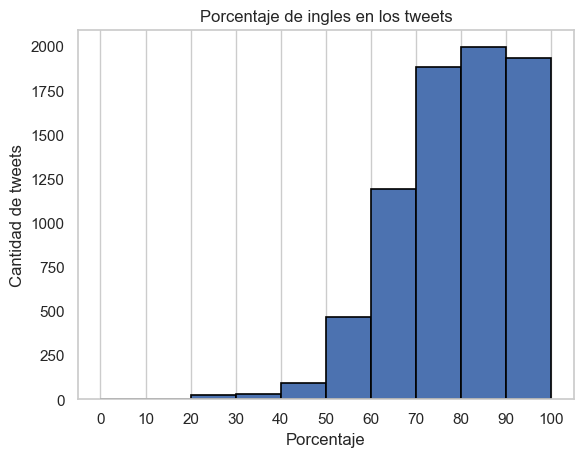

In [16]:
ax = plt.hist(N_df.porcentaje_de_ingles,color = 'b', bins = 10, edgecolor='black', linewidth=1.2)
plt.title("Porcentaje de ingles en los tweets", fontsize = 12)

tick = []
for i in range(0, 100+1, 10):
    tick.append(i)
plt.xticks(tick)

plt.xlabel('Porcentaje')
plt.ylabel('Cantidad de tweets')

plt.grid(which = 'major', axis = 'y')

In [29]:
N_df_falsos = N_df[N_df.target == 0]
N_df_verdaderos = N_df[N_df.target == 1]

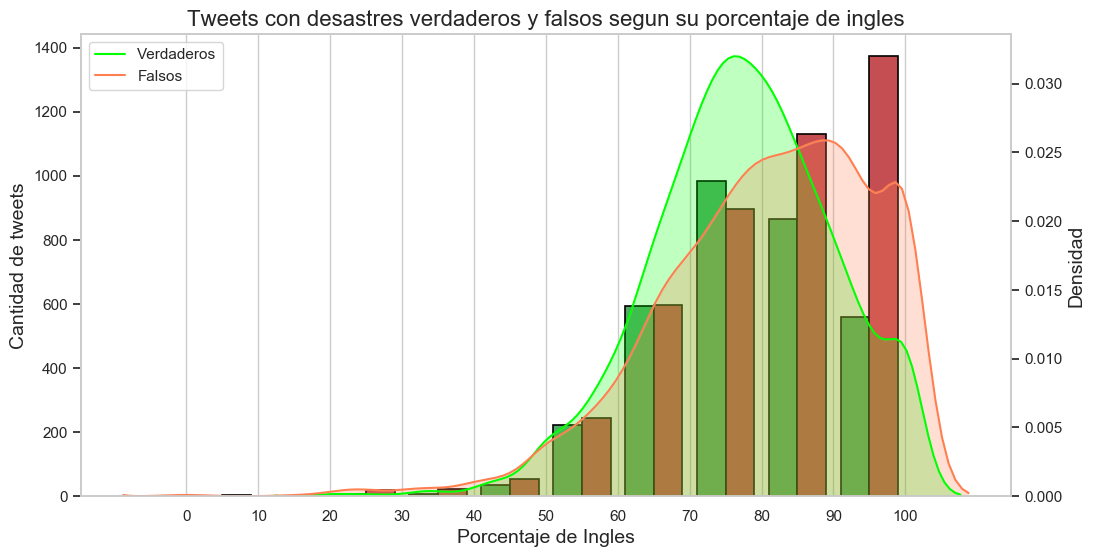

In [42]:
#Los tweets con un porcentaje de ingles mayor al 90% parecen tener mayor probabilidad de ser falsos.
fig, ax1 = plt.subplots()


ax1.set_xlabel("Porcentaje de Ingles", fontsize = 14)
ax1.set_ylabel("Cantidad de tweets", fontsize = 14)

ax1.hist([N_df_verdaderos.porcentaje_de_ingles, N_df_falsos.porcentaje_de_ingles], color = ['g', 'r'], bins = 10, edgecolor='black', linewidth=1.2)
ax1.tick_params(axis='y')
ax1.grid(which = 'major', axis = 'y')

ax2 = ax1.twinx()  
ax2.set_ylabel("Densidad", fontsize = 14)
ax2.grid(False)

sns.kdeplot(np.array(N_df_verdaderos.porcentaje_de_ingles), color = 'lime', shade = True, label = "Verdaderos")
sns.kdeplot(np.array(N_df_falsos.porcentaje_de_ingles), shade = True, label = "Falsos", color = 'coral')
plt.legend(loc='upper left')

fig.set_figheight(6)
fig.set_figwidth(12)

tick = []
for i in range(0, 101, 10):
    tick.append(i)

plt.xticks(tick)
plt.title("Tweets con desastres verdaderos y falsos segun su porcentaje de ingles", fontsize = 16)


plt.show()

In [44]:
''' Considerando que al menos un 50% del texto tiene que estar en ingles para que se considere que esta en ingles, podemos ver
cuantos textos vamos a rechazar, porque los textos que no esten en ingles no se podran analizar, ya que analizar textos
en todos los idiomas del mundo es sumamente complejo '''
N_df['tweets_en_ingles'] = N_df.porcentaje_de_ingles >= 50 #el threshold es del 50%, si la mitad del tweet tiene ingles, seguramente este en ingles.

In [45]:
N_df.tweets_en_ingles.value_counts() #Solo se descartan 150 tweets, menos de un 0.02% de los tweets

True     7463
False     150
Name: tweets_en_ingles, dtype: int64

In [ ]:
# 1. Diferenciar preguntas de afirmaciones (relacionar con el target)

In [46]:
N_df['es_pregunta'] = N_df.text.map(lambda x: isQuestion(x))  

In [50]:
N_df['preguntas_con_desastre'] = N_df.es_pregunta & N_df.target
N_df['preguntas_sin_desastre'] = N_df.es_pregunta & (N_df.target.apply(lambda x: 1 if x == 0 else 0))

Text(0, 0.5, 'Name of Category')

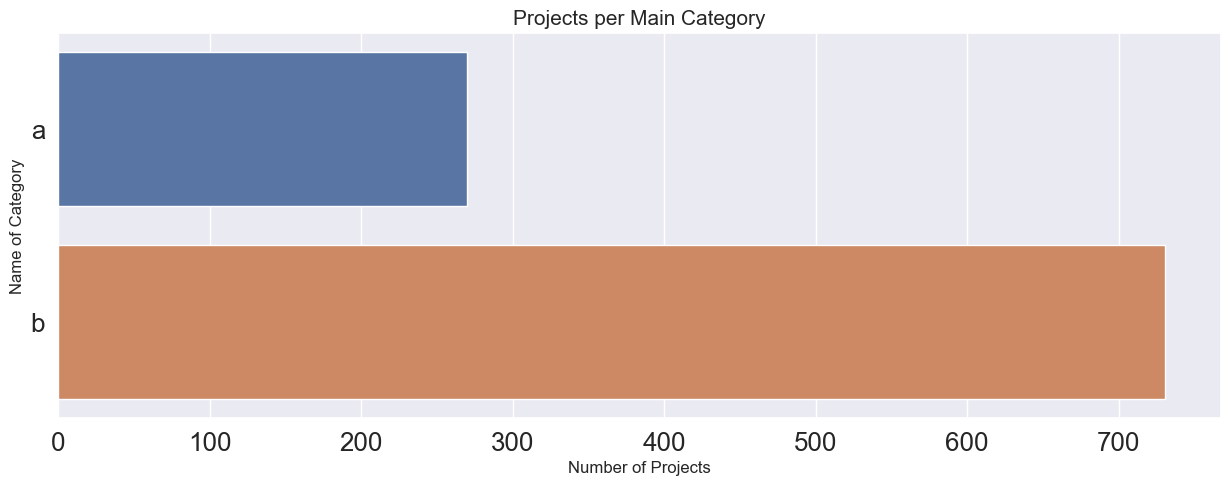

In [20]:
g = sns.barplot
(x=[df.preguntasConDesastre.sum(), df.preguntasSinDesastre.sum()], y=['a','b'], orient='h')
g.set_title("Projects per Main Category", fontsize=15)
g.set_xlabel("Number of Projects", fontsize=12)
g.set_ylabel("Name of Category", fontsize=12)